<a href="https://colab.research.google.com/github/Kaif974/Statistics/blob/main/Statistics_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Q1.Write a Python program to perform a Z-test for comparing a sample mean to a known population mean and interpret the results.

In [1]:
from scipy import stats

# Sample data
sample = [45, 50, 47, 49, 52, 46, 48]
population_mean = 50
sample_mean = sum(sample) / len(sample)
sample_std = stats.tstd(sample)
n = len(sample)

# Perform Z-test
z_score = (sample_mean - population_mean) / (sample_std / (n ** 0.5))
p_value = 2 * (1 - stats.norm.cdf(abs(z_score)))

print("Z-score:", z_score)
print("P-value:", p_value)


Z-score: -2.038562656608332
P-value: 0.04149369542702397


Q2.Simulate random data to perform hypothesis testing and calculate the corresponding P-value using Python.

In [2]:
import numpy as np
from scipy.stats import norm

np.random.seed(0)
data = np.random.normal(loc=50, scale=5, size=100)
sample_mean = np.mean(data)
z = (sample_mean - 50) / (np.std(data, ddof=1) / np.sqrt(len(data)))
p = 2 * (1 - norm.cdf(abs(z)))

print("Simulated Mean:", sample_mean)
print("Z-Score:", z)
print("P-Value:", p)


Simulated Mean: 50.29904007767244
Z-Score: 0.5904283402851938
P-Value: 0.5549035151647068


Q3.Implement a one-sample Z-test using Python to compare the sample mean with the population mean.

In [3]:
def one_sample_z_test(sample, population_mean):
    import numpy as np
    from scipy.stats import norm

    mean_sample = np.mean(sample)
    std_sample = np.std(sample, ddof=1)
    z = (mean_sample - population_mean) / (std_sample / np.sqrt(len(sample)))
    p = 2 * (1 - norm.cdf(abs(z)))
    return z, p

sample_data = [52, 48, 50, 47, 51, 49]
z, p = one_sample_z_test(sample_data, 50)
print("Z:", z, "P-value:", p)


Z: -0.6546536707079771 P-value: 0.5126907602619235


Q4.Perform a two-tailed Z-test using Python and visualize the decision region on a plot.

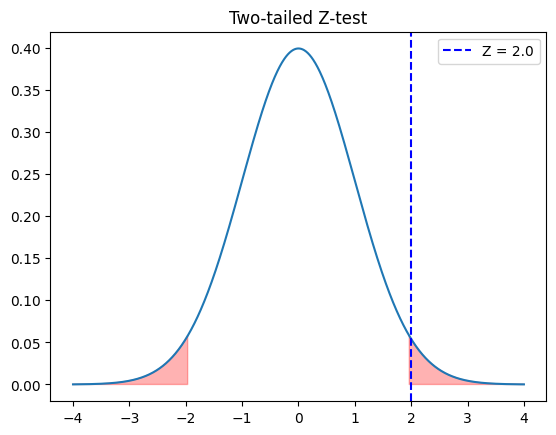

In [4]:
import matplotlib.pyplot as plt

z_score = 2.0
alpha = 0.05
x = np.linspace(-4, 4, 1000)
y = norm.pdf(x)

plt.plot(x, y)
plt.fill_between(x, y, where=(x <= norm.ppf(alpha/2)) | (x >= norm.ppf(1 - alpha/2)), color='red', alpha=0.3)
plt.axvline(z_score, color='blue', linestyle='--', label=f'Z = {z_score}')
plt.title("Two-tailed Z-test")
plt.legend()
plt.show()


Q5.Create a Python function that calculates and visualizes Type 1 and Type 2 errors during hypothesis testing.

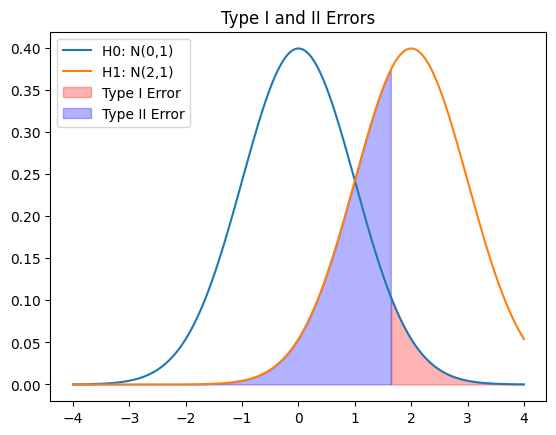

In [5]:
def visualize_type_errors():
    x = np.linspace(-4, 4, 1000)
    y1 = norm.pdf(x, 0, 1)
    y2 = norm.pdf(x, 2, 1)

    plt.plot(x, y1, label='H0: N(0,1)')
    plt.plot(x, y2, label='H1: N(2,1)')
    plt.fill_between(x, y1, where=x > 1.645, color='red', alpha=0.3, label='Type I Error')
    plt.fill_between(x, y2, where=x < 1.645, color='blue', alpha=0.3, label='Type II Error')
    plt.legend()
    plt.title("Type I and II Errors")
    plt.show()

visualize_type_errors()


Q6. Write a Python program to perform an independent T-test and interpret the results.

In [6]:
from scipy.stats import ttest_ind

group1 = [20, 22, 23, 25, 24]
group2 = [27, 29, 30, 28, 26]
t_stat, p_val = ttest_ind(group1, group2)

print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: -4.669737852696146
P-value: 0.0016030621844738144


Q7. Perform a paired sample T-test using Python and visualize the comparison results.

In [7]:
from scipy.stats import ttest_rel

before = [20, 21, 19, 18, 22]
after = [22, 23, 21, 20, 24]
t_stat, p_val = ttest_rel(before, after)

print("T-statistic:", t_stat)
print("P-value:", p_val)


T-statistic: -inf
P-value: 0.0


/usr/local/lib/python3.11/dist-packages/scipy/stats/_axis_nan_policy.py:430: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  return hypotest_fun_in(*args, **kwds)


Q8.Simulate data and perform both Z-test and T-test, then compare the results using Python.

In [8]:
# Reusing samples
sample = np.random.normal(50, 5, 30)

# Z-test
z = (np.mean(sample) - 50) / (np.std(sample, ddof=1) / np.sqrt(len(sample)))
pz = 2 * (1 - norm.cdf(abs(z)))

# T-test
from scipy.stats import ttest_1samp
t_stat, pt = ttest_1samp(sample, 50)

print("Z-test P:", pz)
print("T-test P:", pt)


Z-test P: 0.03526225418449891
T-test P: 0.04403975413802178


Q9.Write a Python function to calculate the confidence interval for a sample mean and explain its significance.

In [9]:
def confidence_interval(sample, confidence=0.95):
    import numpy as np
    import scipy.stats as stats
    mean = np.mean(sample)
    sem = stats.sem(sample)
    margin = sem * stats.t.ppf((1 + confidence) / 2., len(sample)-1)
    return mean - margin, mean + margin

sample = np.random.normal(60, 10, 100)
ci = confidence_interval(sample)
print("Confidence Interval:", ci)


Confidence Interval: (np.float64(57.63557249915351), np.float64(61.33846700493321))


Q10.Write a Python program to calculate the margin of error for a given confidence level using sample data.

In [15]:
from scipy import stats
import numpy as np

def margin_of_error(data, confidence=0.95):
    n = len(data)
    std_err = stats.sem(data)
    margin = std_err * stats.t.ppf((1 + confidence) / 2, n - 1)
    return margin

data = [52, 55, 60, 58, 53, 57, 59, 54]
moe = margin_of_error(data, confidence=0.95)
print(f"{moe:.4f}")


2.4476


Q11.Implement a Bayesian inference method using Bayes' Theorem in Python.

In [16]:
def bayesian_inference(prior, likelihood, evidence):
    posterior = (likelihood * prior) / evidence
    return posterior

prior_probability = 0.3
likelihood = 0.7
evidence = 0.4

posterior = bayesian_inference(prior_probability, likelihood, evidence)
print(f"Posterior probability (P(H|E)): {posterior}")


Posterior probability (P(H|E)): 0.5249999999999999


Q12.Perform a Chi-square test for independence between two categorical variables in Python.

In [17]:
import numpy as np
import scipy.stats as stats

data = np.array([[10, 20, 30],
                 [6,  9,  17]])

chi2, p, dof, expected = stats.chi2_contingency(data)

print(f"Chi2 Value: {chi2}")
print(f"P-Value: {p}")
print(f"Degrees of Freedom: {dof}")
print(f"Expected Frequencies: \n{expected}")

if p < 0.05:
    print("Reject the null hypothesis: The variables are dependent.")
else:
    print("Fail to reject the null hypothesis: The variables are independent.")


Chi2 Value: 0.27157465150403504
P-Value: 0.873028283380073
Degrees of Freedom: 2
Expected Frequencies: 
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]
Fail to reject the null hypothesis: The variables are independent.


Q13.Write a Python program to calculate the expected frequencies for a Chi-square test based on observed data.

In [18]:
import numpy as np

def calculate_expected_frequencies(observed):
    row_totals = observed.sum(axis=1)
    column_totals = observed.sum(axis=0)
    grand_total = observed.sum()

    expected = np.outer(row_totals, column_totals) / grand_total
    return expected

observed_data = np.array([[10, 20, 30],
                          [6, 9, 17]])

expected_frequencies = calculate_expected_frequencies(observed_data)
print(f"Expected Frequencies: \n{expected_frequencies}")


Expected Frequencies: 
[[10.43478261 18.91304348 30.65217391]
 [ 5.56521739 10.08695652 16.34782609]]


Q14.Perform a goodness-of-fit test using Python to compare the observed data to an expected distribution.

In [19]:
import numpy as np
import scipy.stats as stats

observed_data = np.array([50, 30, 20])
expected_data = np.array([40, 40, 20])

chi2, p = stats.chisquare(observed_data, expected_data)

print(f"Chi2 Value: {chi2}")
print(f"P-Value: {p}")

if p < 0.05:
    print("Reject the null hypothesis: The observed data does not fit the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The observed data fits the expected distribution.")


Chi2 Value: 5.0
P-Value: 0.0820849986238988
Fail to reject the null hypothesis: The observed data fits the expected distribution.


Q15.Create a Python script to simulate and visualize the Chi-square distribution and discuss its characteristics.

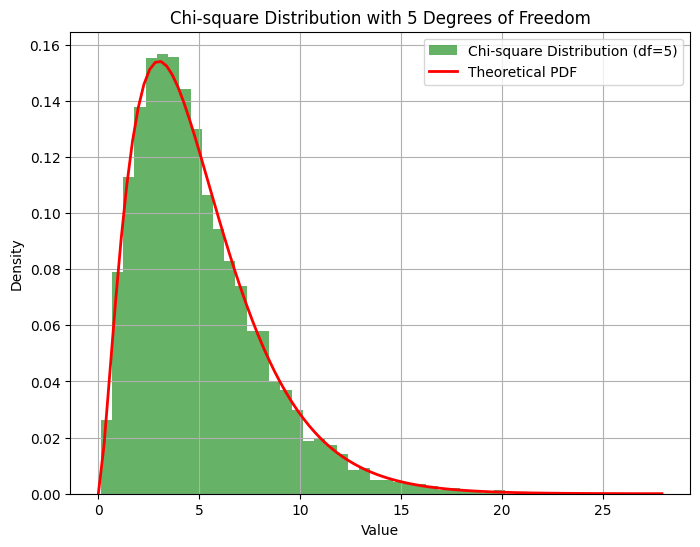

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Parameters for the Chi-square distribution
df = 5  # degrees of freedom

# Generate random samples from a Chi-square distribution
samples = np.random.chisquare(df, 10000)

# Plot the histogram of the Chi-square distribution
plt.figure(figsize=(8, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='g', label=f'Chi-square Distribution (df={df})')

# Plot the theoretical Chi-square distribution
x = np.linspace(0, max(samples), 100)
plt.plot(x, stats.chi2.pdf(x, df), 'r-', lw=2, label='Theoretical PDF')

plt.title(f'Chi-square Distribution with {df} Degrees of Freedom')
plt.xlabel('Value')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Q16. Implement an F-test using Python to compare the variances of two random samples.

In [21]:
import numpy as np
import scipy.stats as stats

sample1 = np.random.normal(loc=0, scale=1, size=100)
sample2 = np.random.normal(loc=0, scale=2, size=100)

var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)

f_statistic = var1 / var2
dof1 = len(sample1) - 1
dof2 = len(sample2) - 1

p_value = 1 - stats.f.cdf(f_statistic, dof1, dof2)

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: The variances are not significantly different.")


F-Statistic: 0.2516955171395961
P-Value: 0.9999999999795388
Fail to reject the null hypothesis: The variances are not significantly different.


Q17.Write a Python program to perform an ANOVA test to compare means between multiple groups and interpret the results.

In [22]:
import numpy as np
import scipy.stats as stats

group1 = np.random.normal(loc=10, scale=1, size=30)
group2 = np.random.normal(loc=12, scale=1, size=30)
group3 = np.random.normal(loc=14, scale=1, size=30)

f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")


F-Statistic: 92.09201982056507
P-Value: 3.3273463922419296e-22
Reject the null hypothesis: The means are significantly different.


Q18.Perform a one-way ANOVA test using Python to compare the means of different groups and plot the results.

F-Statistic: 134.54138551514205
P-Value: 2.380239659611106e-27
Reject the null hypothesis: The means are significantly different.


<ipython-input-23-324e3b977ddb>:21: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([group1, group2, group3], labels=['Group 1', 'Group 2', 'Group 3'], patch_artist=True,


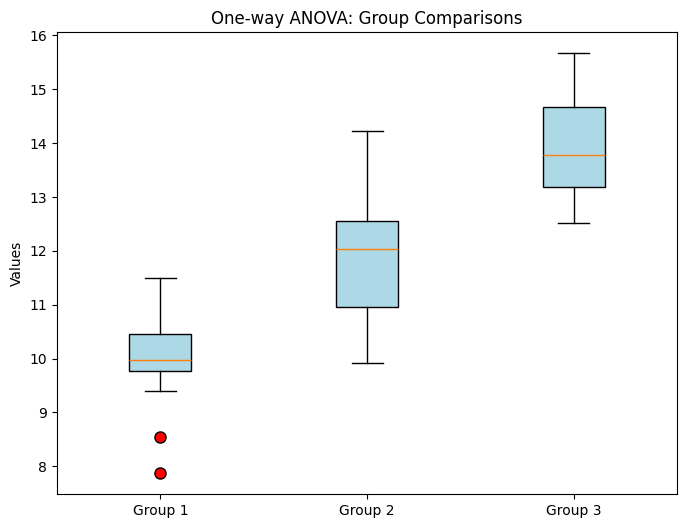

In [23]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

group1 = np.random.normal(loc=10, scale=1, size=30)
group2 = np.random.normal(loc=12, scale=1, size=30)
group3 = np.random.normal(loc=14, scale=1, size=30)

f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")

# Plot the results
plt.figure(figsize=(8, 6))
plt.boxplot([group1, group2, group3], labels=['Group 1', 'Group 2', 'Group 3'], patch_artist=True,
            boxprops=dict(facecolor='lightblue', color='black'), flierprops=dict(markerfacecolor='red', marker='o', markersize=8))
plt.title("One-way ANOVA: Group Comparisons")
plt.ylabel("Values")
plt.show()


Q19.Write a Python function to check the assumptions (normality, independence, and equal variance) for ANOVA.

In [24]:
import numpy as np
import scipy.stats as stats

def check_anova_assumptions(groups):
    normality_results = []
    for group in groups:
        stat, p = stats.shapiro(group)
        normality_results.append(p)
        print(f"Normality Test (Shapiro-Wilk) for group: p-value = {p}")

    if all(p > 0.05 for p in normality_results):
        print("Normality assumption: Passed")
    else:
        print("Normality assumption: Failed")

    independence = "Assumed based on study design"
    print(f"Independence assumption: {independence}")

    equal_variance_stat, equal_variance_p = stats.levene(*groups)
    print(f"Equal Variance Test (Levene) p-value = {equal_variance_p}")

    if equal_variance_p > 0.05:
        print("Equal Variance assumption: Passed")
    else:
        print("Equal Variance assumption: Failed")

# Example groups
group1 = np.random.normal(loc=10, scale=1, size=30)
group2 = np.random.normal(loc=12, scale=1, size=30)
group3 = np.random.normal(loc=14, scale=1, size=30)

check_anova_assumptions([group1, group2, group3])


Normality Test (Shapiro-Wilk) for group: p-value = 0.7482828268984039
Normality Test (Shapiro-Wilk) for group: p-value = 0.6965152500239907
Normality Test (Shapiro-Wilk) for group: p-value = 0.156470722193074
Normality assumption: Passed
Independence assumption: Assumed based on study design
Equal Variance Test (Levene) p-value = 0.07917654264319547
Equal Variance assumption: Passed


Q20.Perform a two-way ANOVA test using Python to study the interaction between two factors and visualize the results.

F-statistic: 2.742392667912997
P-value: 0.02410329592383763
Reject the null hypothesis: There is a significant interaction between Factor A and Factor B.


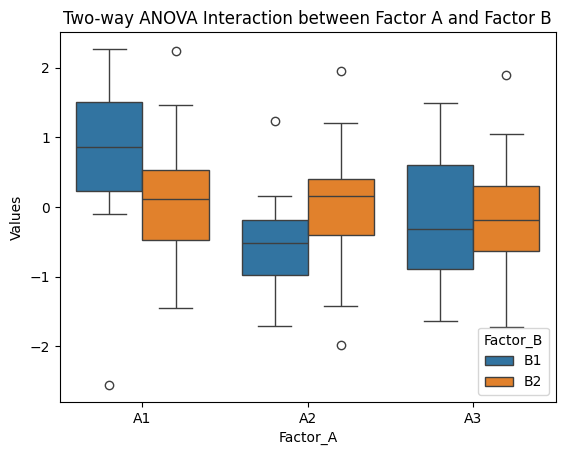

In [25]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

# Generate example data for two factors (Factor A and Factor B)
np.random.seed(0)

factor_a = np.repeat(['A1', 'A2', 'A3'], 30)
factor_b = np.tile(['B1', 'B2'], 45)
values = np.random.normal(loc=0, scale=1, size=90)

# Create a DataFrame
data = pd.DataFrame({'Factor_A': factor_a, 'Factor_B': factor_b, 'Values': values})

# Perform two-way ANOVA
model = stats.f_oneway(
    data.loc[(data['Factor_A'] == 'A1') & (data['Factor_B'] == 'B1'), 'Values'],
    data.loc[(data['Factor_A'] == 'A1') & (data['Factor_B'] == 'B2'), 'Values'],
    data.loc[(data['Factor_A'] == 'A2') & (data['Factor_B'] == 'B1'), 'Values'],
    data.loc[(data['Factor_A'] == 'A2') & (data['Factor_B'] == 'B2'), 'Values'],
    data.loc[(data['Factor_A'] == 'A3') & (data['Factor_B'] == 'B1'), 'Values'],
    data.loc[(data['Factor_A'] == 'A3') & (data['Factor_B'] == 'B2'), 'Values']
)

print(f"F-statistic: {model.statistic}")
print(f"P-value: {model.pvalue}")

if model.pvalue < 0.05:
    print("Reject the null hypothesis: There is a significant interaction between Factor A and Factor B.")
else:
    print("Fail to reject the null hypothesis: There is no significant interaction between Factor A and Factor B.")

# Visualize the interaction between Factor A and Factor B
sns.boxplot(x='Factor_A', y='Values', hue='Factor_B', data=data)
plt.title("Two-way ANOVA Interaction between Factor A and Factor B")
plt.show()


Q21.Write a Python program to visualize the F-distribution and discuss its use in hypothesis testing.

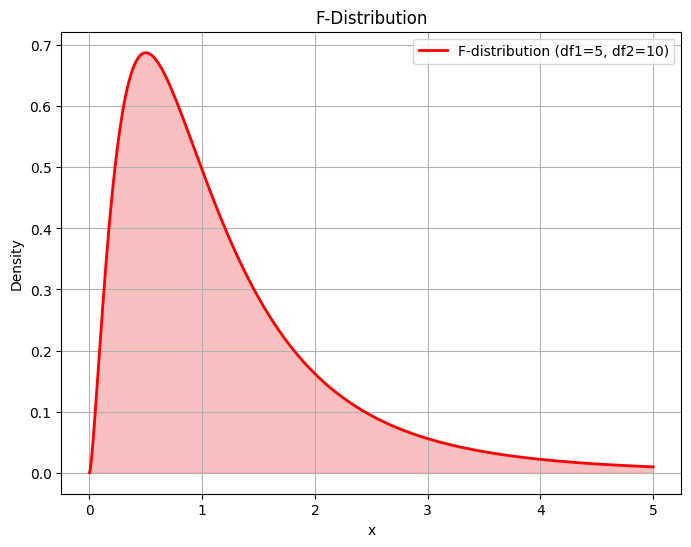

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

df1 = 5
df2 = 10

x = np.linspace(0, 5, 1000)

pdf = stats.f.pdf(x, df1, df2)

plt.figure(figsize=(8, 6))
plt.plot(x, pdf, 'r-', lw=2, label=f'F-distribution (df1={df1}, df2={df2})')
plt.fill_between(x, 0, pdf, color='lightcoral', alpha=0.5)
plt.title('F-Distribution')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()


Q22.Perform a one-way ANOVA test in Python and visualize the results with boxplots to compare group means.

F-Statistic: 95.08549913632127
P-Value: 1.2869414755958188e-22
Reject the null hypothesis: The means are significantly different.


/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)
/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:700: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  artists = ax.bxp(**boxplot_kws)


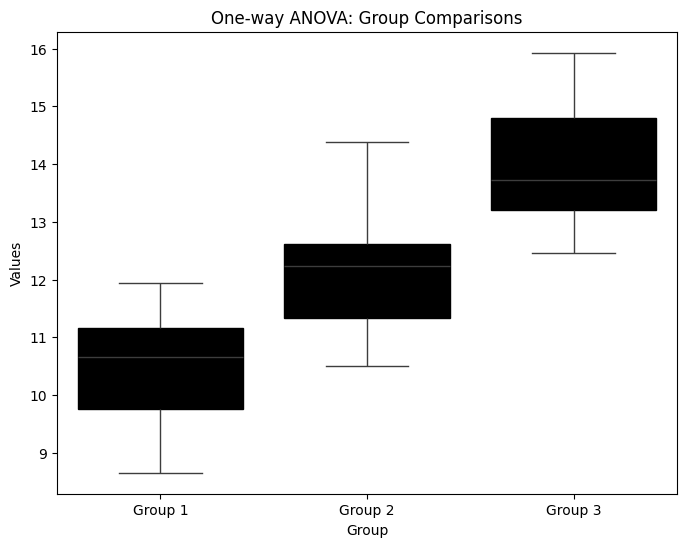

In [27]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

group1 = np.random.normal(loc=10, scale=1, size=30)
group2 = np.random.normal(loc=12, scale=1, size=30)
group3 = np.random.normal(loc=14, scale=1, size=30)

f_statistic, p_value = stats.f_oneway(group1, group2, group3)

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")

# Plot the results using boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(data=[group1, group2, group3], patch_artist=True, boxprops=dict(facecolor='lightblue', color='black'))
plt.title("One-way ANOVA: Group Comparisons")
plt.xlabel("Group")
plt.ylabel("Values")
plt.xticks([0, 1, 2], ['Group 1', 'Group 2', 'Group 3'])
plt.show()


Q23.Simulate random data from a normal distribution, then perform hypothesis testing to evaluate the means.

In [28]:
import numpy as np
import scipy.stats as stats

np.random.seed(0)
group1 = np.random.normal(loc=10, scale=2, size=50)
group2 = np.random.normal(loc=12, scale=2, size=50)

t_statistic, p_value = stats.ttest_ind(group1, group2)

print(f"T-Statistic: {t_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The means are significantly different.")
else:
    print("Fail to reject the null hypothesis: The means are not significantly different.")


T-Statistic: -4.1311732760688
P-Value: 7.604048369144464e-05
Reject the null hypothesis: The means are significantly different.


Q24.Perform a hypothesis test for population variance using a Chi-square distribution and interpret the results.

In [29]:
import numpy as np
import scipy.stats as stats

np.random.seed(0)
sample = np.random.normal(loc=10, scale=2, size=50)

sample_variance = np.var(sample, ddof=1)
population_variance = 4
df = len(sample) - 1

chi_square_statistic = (df * sample_variance) / population_variance
p_value = 2 * min(stats.chi2.cdf(chi_square_statistic, df), 1 - stats.chi2.cdf(chi_square_statistic, df))

print(f"Chi-square Statistic: {chi_square_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The population variance is significantly different.")
else:
    print("Fail to reject the null hypothesis: The population variance is not significantly different.")


Chi-square Statistic: 63.34009223471551
P-Value: 0.16354029676832482
Fail to reject the null hypothesis: The population variance is not significantly different.


Q25.Write a Python script to perform a Z-test for comparing proportions between two datasets or groups.

In [30]:
import numpy as np
import scipy.stats as stats

successes1 = 45
n1 = 100
successes2 = 40
n2 = 100

p1 = successes1 / n1
p2 = successes2 / n2

p_pool = (successes1 + successes2) / (n1 + n2)

z_statistic = (p1 - p2) / np.sqrt(p_pool * (1 - p_pool) * (1/n1 + 1/n2))

p_value = 2 * (1 - stats.norm.cdf(abs(z_statistic)))

print(f"Z-Statistic: {z_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The proportions are significantly different.")
else:
    print("Fail to reject the null hypothesis: The proportions are not significantly different.")


Z-Statistic: 0.7151985398521514
P-Value: 0.4744863711713392
Fail to reject the null hypothesis: The proportions are not significantly different.


Q26. Implement an F-test for comparing the variances of two datasets, then interpret and visualize the results.

F-Statistic: 0.31364451965555884
P-Value: 0.9999580297575418
Fail to reject the null hypothesis: The variances are not significantly different.


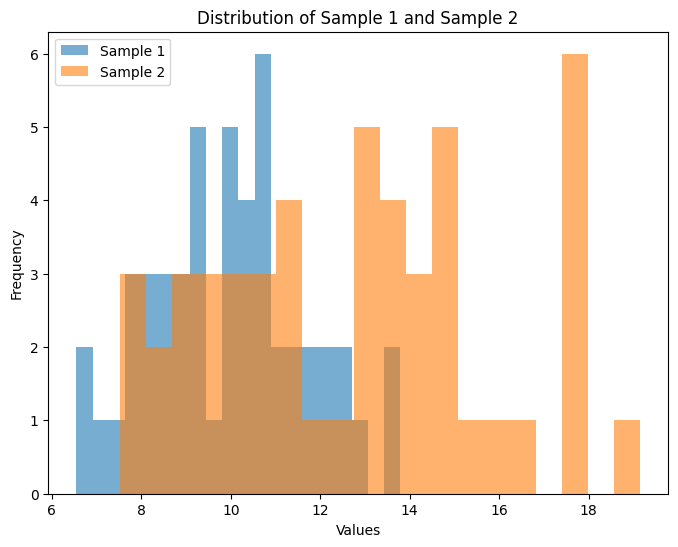

In [31]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

sample1 = np.random.normal(loc=10, scale=2, size=50)
sample2 = np.random.normal(loc=12, scale=3, size=50)

var1 = np.var(sample1, ddof=1)
var2 = np.var(sample2, ddof=1)

f_statistic = var1 / var2
dof1 = len(sample1) - 1
dof2 = len(sample2) - 1

p_value = 1 - stats.f.cdf(f_statistic, dof1, dof2)

print(f"F-Statistic: {f_statistic}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The variances are significantly different.")
else:
    print("Fail to reject the null hypothesis: The variances are not significantly different.")

plt.figure(figsize=(8, 6))
plt.hist(sample1, bins=20, alpha=0.6, label='Sample 1')
plt.hist(sample2, bins=20, alpha=0.6, label='Sample 2')
plt.legend()
plt.title("Distribution of Sample 1 and Sample 2")
plt.xlabel("Values")
plt.ylabel("Frequency")
plt.show()


Q27.Perform a Chi-square test for goodness of fit with simulated data and analyze the results.

In [32]:
import numpy as np
import scipy.stats as stats

observed = np.array([50, 30, 20])
expected = np.array([40, 40, 20])

chi2_stat, p_value = stats.chisquare(observed, expected)

print(f"Chi-square Statistic: {chi2_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Reject the null hypothesis: The observed distribution is significantly different from the expected distribution.")
else:
    print("Fail to reject the null hypothesis: The observed distribution is not significantly different from the expected distribution.")


Chi-square Statistic: 5.0
P-Value: 0.0820849986238988
Fail to reject the null hypothesis: The observed distribution is not significantly different from the expected distribution.
